In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import calendar
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import fetch_covtype
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
import numpy as np
import pickle

import warnings
warnings.filterwarnings('ignore')

In [14]:
#Reading data
df = pd.read_csv("monatszahlen2209_verkehrsunfaelle.csv")

In [15]:
df.head()

,MONATSZAHL,AUSPRÄGUNG,JAHR,MONAT,WERT,VORJAHRESWERT,VERÄND_VORMONAT_PROZENT,VERÄND_VORJAHRESMONAT_PROZENT,ZWÖLF_MONATE_MITTELWERT
0,Alkoholunfälle,insgesamt,2022,202201,NaN,16.0,NaN,NaN,NaN
1,Alkoholunfälle,insgesamt,2022,202202,NaN,14.0,NaN,NaN,NaN
2,Alkoholunfälle,insgesamt,2022,202203,NaN,24.0,NaN,NaN,NaN
3,Alkoholunfälle,insgesamt,2022,202204,NaN,16.0,NaN,NaN,NaN
4,Alkoholunfälle,insgesamt,2022,202205,NaN,24.0,NaN,NaN,NaN


- Filtering dataframe for important columns

In [16]:
df= df[["MONATSZAHL","AUSPRÄGUNG","JAHR","MONAT","WERT"]]

In [17]:
df.head()

,MONATSZAHL,AUSPRÄGUNG,JAHR,MONAT,WERT
0,Alkoholunfälle,insgesamt,2022,202201,NaN
1,Alkoholunfälle,insgesamt,2022,202202,NaN
2,Alkoholunfälle,insgesamt,2022,202203,NaN
3,Alkoholunfälle,insgesamt,2022,202204,NaN
4,Alkoholunfälle,insgesamt,2022,202205,NaN


In [18]:
df.shape

(2086, 5)

- The data set contains 2086 records and 5 features

#### Filter data upto 2020

In [19]:
df_2020= df[df["JAHR"]<=2020]
df_2020=df_2020.reset_index(drop=True)

In [20]:
df_2020.head()

,MONATSZAHL,AUSPRÄGUNG,JAHR,MONAT,WERT
0,Alkoholunfälle,insgesamt,2020,Summe,430.0
1,Alkoholunfälle,insgesamt,2020,202001,28.0
2,Alkoholunfälle,insgesamt,2020,202002,40.0
3,Alkoholunfälle,insgesamt,2020,202003,27.0
4,Alkoholunfälle,insgesamt,2020,202004,26.0


In [21]:
df_2020.shape

(1911, 5)

- After filtering the data until 2020, the file contains 1911 records

#### Checking for null values

In [22]:
df_2020.isnull().sum()

MONATSZAHL    0
AUSPRÄGUNG    0
JAHR          0
MONAT         0
WERT          0
dtype: int64

- There is no null values

In [23]:
df_2020.JAHR.value_counts()

2020    91
2009    91
2001    91
2002    91
2003    91
2004    91
2005    91
2006    91
2007    91
2008    91
2010    91
2019    91
2011    91
2012    91
2013    91
2014    91
2015    91
2016    91
2017    91
2018    91
2000    91
Name: JAHR, dtype: int64

#### Renaming the columnnames to English

In [24]:
df_2020.rename(columns={"MONATSZAHL":"Category","AUSPRÄGUNG":"Accident_type","JAHR":"Year","MONAT":"Month","WERT":"Value"}, inplace=True)
df_2020.head()

,Category,Accident_type,Year,Month,Value
0,Alkoholunfälle,insgesamt,2020,Summe,430.0
1,Alkoholunfälle,insgesamt,2020,202001,28.0
2,Alkoholunfälle,insgesamt,2020,202002,40.0
3,Alkoholunfälle,insgesamt,2020,202003,27.0
4,Alkoholunfälle,insgesamt,2020,202004,26.0


- Caterogry: which category accidents happening.
- Accident_type: Which type of accidents happening.
- Month:Which Month accidnts are happening.
- Year:Which year accidents are happening.

In [25]:
df_2020.Month.value_counts()

Summe     147
200606      7
200705      7
200706      7
200707      7
         ... 
201305      7
201306      7
201307      7
201308      7
200012      7
Name: Month, Length: 253, dtype: int64

In [26]:
df_= df_2020[df_2020["Month"]=="Summe"]
df_

,Category,Accident_type,Year,Month,Value
0,Alkoholunfälle,insgesamt,2020,Summe,430.0
13,Alkoholunfälle,insgesamt,2019,Summe,434.0
26,Alkoholunfälle,insgesamt,2018,Summe,398.0
39,Alkoholunfälle,insgesamt,2017,Summe,409.0
52,Alkoholunfälle,insgesamt,2016,Summe,301.0
...,...,...,...,...,...
1846,Verkehrsunfälle,Verletzte und Getötete,2004,Summe,6219.0
1859,Verkehrsunfälle,Verletzte und Getötete,2003,Summe,6365.0
1872,Verkehrsunfälle,Verletzte und Getötete,2002,Summe,7026.0
1885,Verkehrsunfälle,Verletzte und Getötete,2001,Summe,7452.0


- Here the month column contains unexpected value "Summe".There is  no meaning so I am dropping 147 records

In [27]:
df_2020.drop(df_2020[df_2020["Month"]=="Summe"].index,inplace=True)
df_2020

,Category,Accident_type,Year,Month,Value
1,Alkoholunfälle,insgesamt,2020,202001,28.0
2,Alkoholunfälle,insgesamt,2020,202002,40.0
3,Alkoholunfälle,insgesamt,2020,202003,27.0
4,Alkoholunfälle,insgesamt,2020,202004,26.0
5,Alkoholunfälle,insgesamt,2020,202005,40.0
...,...,...,...,...,...
1906,Verkehrsunfälle,Verletzte und Getötete,2000,200008,647.0
1907,Verkehrsunfälle,Verletzte und Getötete,2000,200009,675.0
1908,Verkehrsunfälle,Verletzte und Getötete,2000,200010,615.0
1909,Verkehrsunfälle,Verletzte und Getötete,2000,200011,578.0


#### Extracting the month number

In [28]:
df_2020['Month'] = pd.to_numeric(df_2020['Month'].astype(str).str[-2:], errors='coerce')
df_2020

,Category,Accident_type,Year,Month,Value
1,Alkoholunfälle,insgesamt,2020,1,28.0
2,Alkoholunfälle,insgesamt,2020,2,40.0
3,Alkoholunfälle,insgesamt,2020,3,27.0
4,Alkoholunfälle,insgesamt,2020,4,26.0
5,Alkoholunfälle,insgesamt,2020,5,40.0
...,...,...,...,...,...
1906,Verkehrsunfälle,Verletzte und Getötete,2000,8,647.0
1907,Verkehrsunfälle,Verletzte und Getötete,2000,9,675.0
1908,Verkehrsunfälle,Verletzte und Getötete,2000,10,615.0
1909,Verkehrsunfälle,Verletzte und Getötete,2000,11,578.0


#### Converting month to calender name

In [29]:
df_2020['Month'] = df_2020['Month'].apply(lambda x: calendar.month_abbr[x])
df_2020

,Category,Accident_type,Year,Month,Value
1,Alkoholunfälle,insgesamt,2020,Jan,28.0
2,Alkoholunfälle,insgesamt,2020,Feb,40.0
3,Alkoholunfälle,insgesamt,2020,Mar,27.0
4,Alkoholunfälle,insgesamt,2020,Apr,26.0
5,Alkoholunfälle,insgesamt,2020,May,40.0
...,...,...,...,...,...
1906,Verkehrsunfälle,Verletzte und Getötete,2000,Aug,647.0
1907,Verkehrsunfälle,Verletzte und Getötete,2000,Sep,675.0
1908,Verkehrsunfälle,Verletzte und Getötete,2000,Oct,615.0
1909,Verkehrsunfälle,Verletzte und Getötete,2000,Nov,578.0


In [30]:
df_2020.Category.value_counts()

Verkehrsunfälle    756
Alkoholunfälle     504
Fluchtunfälle      504
Name: Category, dtype: int64

- There are mainly 3 types of Catrgories

In [31]:
df_2020["Accident_type"].value_counts()

insgesamt                 756
Verletzte und Getötete    756
mit Personenschäden       252
Name: Accident_type, dtype: int64

- There are mainly 3 types of Accidents

### Data Analysis and Visualization
#### Number of accident per year by Category

In [32]:
(df_2020.groupby([df_2020.Year,df_2020.Category]).Category.count()).unstack()

Category,Alkoholunfälle,Fluchtunfälle,Verkehrsunfälle
Year,,,
2000,24,24,36
2001,24,24,36
2002,24,24,36
2003,24,24,36
2004,24,24,36
2005,24,24,36
2006,24,24,36
2007,24,24,36
2008,24,24,36


Verkehrsunfälle    756
Alkoholunfälle     504
Fluchtunfälle      504
Name: Category, dtype: int64


<Axes: >

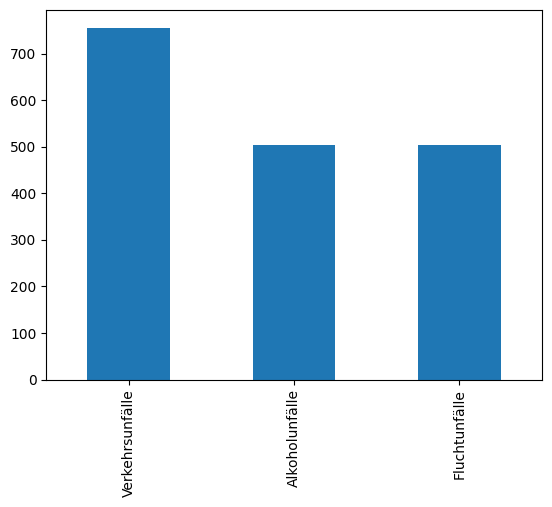

In [33]:
print(df_2020['Category'].value_counts())
df_2020['Category'].value_counts().plot(kind='bar')

- From the above analysis Verkehrsunfälle accidents are high in all years.

#### Number of accident per Month by Category

In [34]:
(df_2020.groupby([df_2020.Month,df_2020.Category]).Category.count()).unstack()

Category,Alkoholunfälle,Fluchtunfälle,Verkehrsunfälle
Month,,,
Apr,42,42,63
Aug,42,42,63
Dec,42,42,63
Feb,42,42,63
Jan,42,42,63
Jul,42,42,63
Jun,42,42,63
Mar,42,42,63
May,42,42,63


<Axes: >

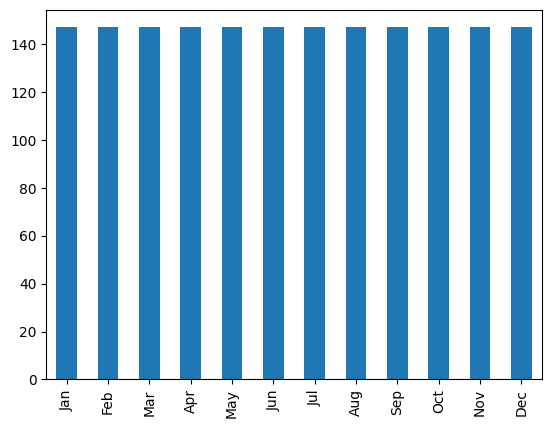

In [35]:
df_2020['Month'].value_counts().plot(kind='bar')

- From the above graph  all the months are sharing equal number of accidents.

In [36]:
(df_2020.groupby([df_2020["Accident_type"],df_2020.Category]).Category.count()).unstack()

Category,Alkoholunfälle,Fluchtunfälle,Verkehrsunfälle
Accident_type,,,
Verletzte und Getötete,252.0,252.0,252.0
insgesamt,252.0,252.0,252.0
mit Personenschäden,NaN,NaN,252.0


<Axes: >

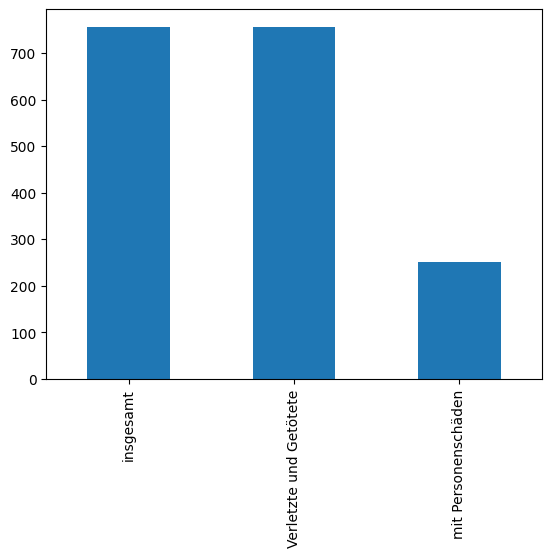

In [37]:
df_2020['Accident_type'].value_counts().plot(kind='bar')

- From the above graph  insgesamt and Verletzte und Getötete  accidents are more than mit Personenschäden	 accidents

#### Auto data visualization using the ‘dabl’ library


Target looks like regression


[<Axes: title={'center': 'Target distribution'}, xlabel='Value', ylabel='frequency'>,
 array([[<Axes: title={'center': 'F=-5.30E-02'}, xlabel='Year (jittered)', ylabel='Value'>]],
       dtype=object),
 array([[<Axes: title={'center': 'F=7.62E-01'}, xlabel='Value', ylabel='Category'>,
         <Axes: title={'center': 'F=4.94E-01'}, xlabel='Value', ylabel='Accident_type'>,
         <Axes: title={'center': 'F=2.33E-01'}, xlabel='Value', ylabel='Month'>]],
       dtype=object)]

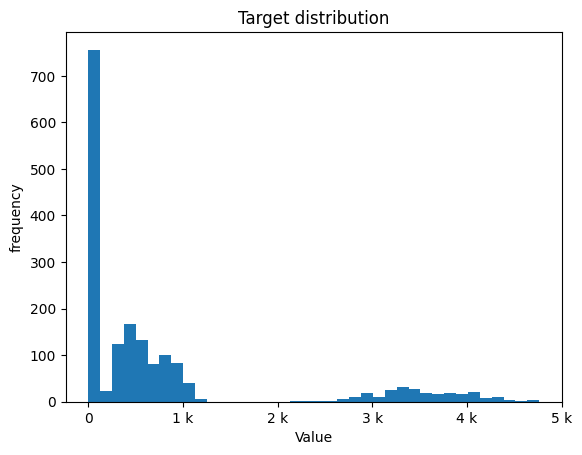

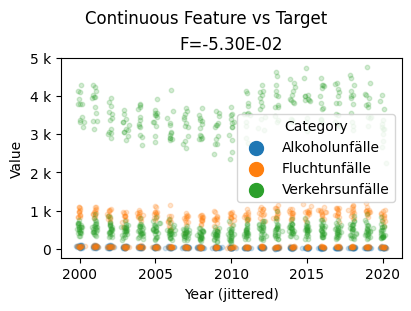

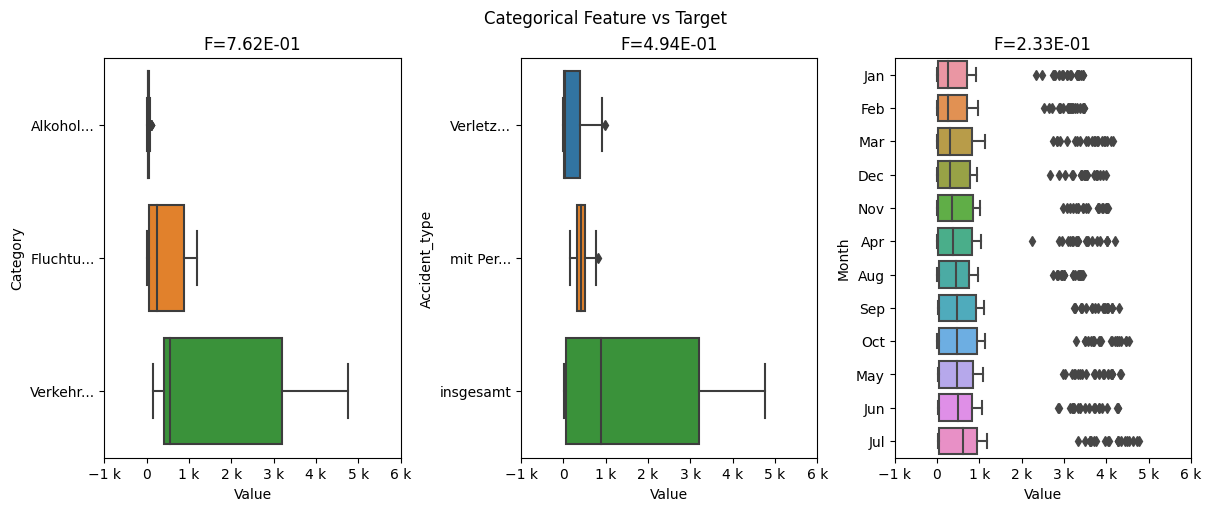

In [38]:
# Visualizing dataset using dabl library
import dabl
dabl.plot(df_2020, target_col='Value')

- Using just one line of code, we can visualize the relationships between input features and a target variable.

#### Association between the ‘Category’ column and target ‘Value’

<function matplotlib.pyplot.show(close=None, block=None)>

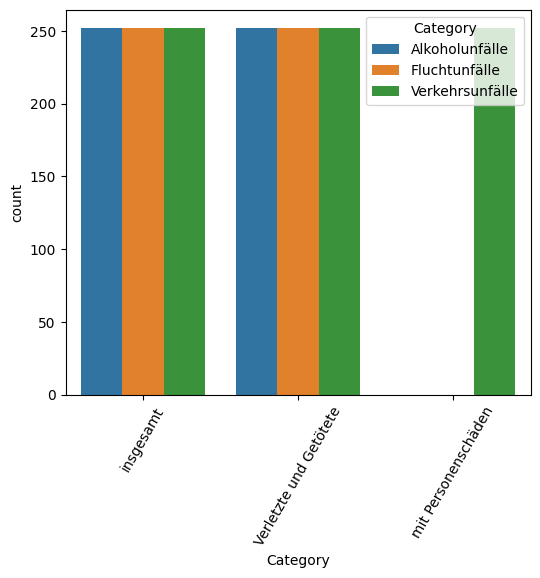

In [39]:
# plot the bar plot of Category and Accident-type
plt.figure(figsize=(6,5))
sns.countplot(x='Accident_type', hue='Category', data=df_2020)
plt.xlabel('Category')
plt.xticks(rotation=60)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

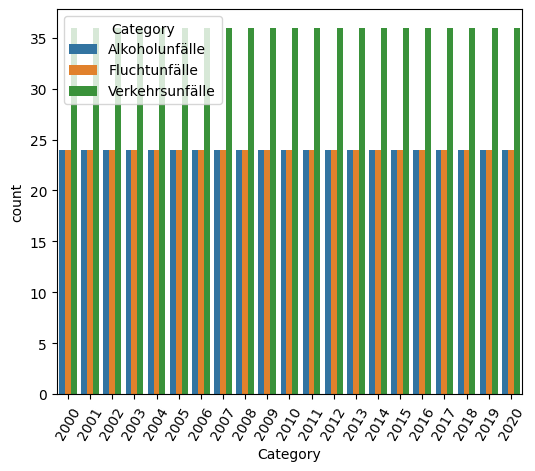

In [40]:
# plot the bar plot of Category and year
plt.figure(figsize=(6,5))
sns.countplot(x='Year', hue='Category', data=df_2020)
plt.xlabel('Category')
plt.xticks(rotation=60)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

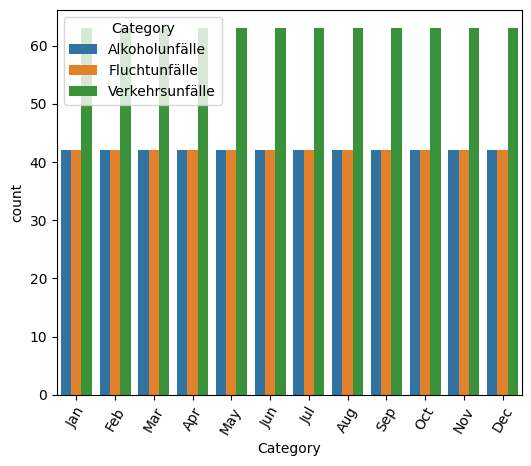

In [41]:
# plot the bar plot of Category and Month
plt.figure(figsize=(6,5))
sns.countplot(x='Month', hue='Category', data=df_2020)
plt.xlabel('Category')
plt.xticks(rotation=60)
plt.show

- From the all above visualization we observining the Verkehrsunfälle Accident category the maximun times happend.

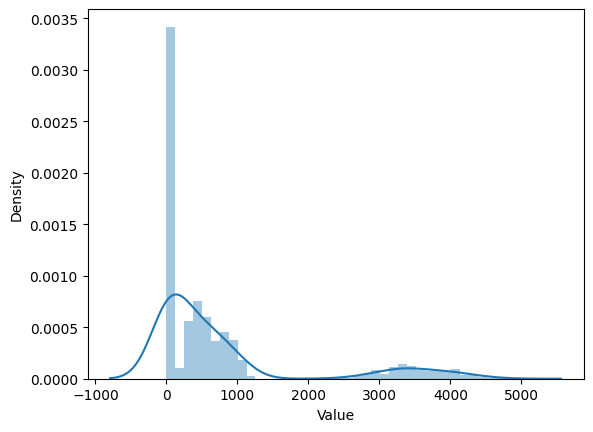

In [42]:
sns.distplot(df_2020.Value)
plt.show()

<Axes: >

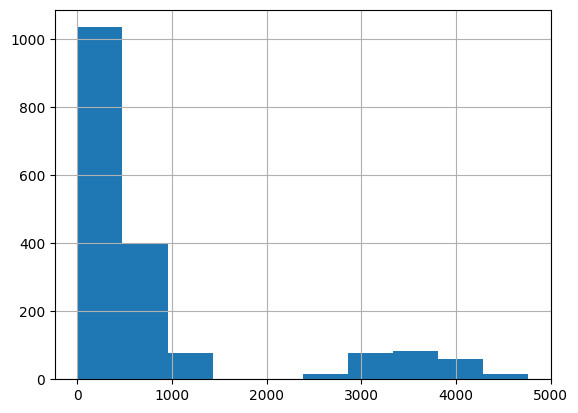

In [43]:
df_2020.Value.hist()

- From the above graph the target column data  is not normally disributed.
- ML models work very well in the case of non-normally distributed data also. Models like decision tree, Random forest and XgBoost etc.Don’t assume any normality and work on raw data as well.

#### One-Hot encoding using Sklearn Label encoding method
- Category column and Accident_type columns are maping with numbers.
- Year and Month columns are lebel endcoding using sklearn lebel encoder.

In [44]:
# Categorical features to encode using one hot encoding 
features = ['Category','Accident_type','Year','Month']

# setting input features X and target y 
X = df_2020[features]  # here features are selected from 'object' datatype
y = df_2020['Value']

#category column encoding
cat_mapping = {'Verkehrsunfälle': 0,
                'Alkoholunfälle':1 ,
                'Fluchtunfälle': 2}
X['Category'] = X['Category'].map(cat_mapping)

#Accident_type column mapping

accid_mapping = {'insgesamt': 0,
                'Verletzte und Getötete':1 ,
                'mit Personenschäden': 2}
X['Accident_type'] = X['Accident_type'].map(accid_mapping)
le = LabelEncoder()
X['Year'] = le.fit_transform(X['Year'])
X['Month'] = le.fit_transform(X['Month'])
#encoded_df.shape
X.shape

(1764, 4)

In [51]:
X.Category.value_counts()

0    756
1    504
2    504
Name: Category, dtype: int64

### Machine Learning Model
#### train and test split

In [52]:
# train and test split and building baseline model to predict target features
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### DecisionTreeRegressor model building

In [53]:
# Fitting Decision Tree Regression to the dataset
regressor = DecisionTreeRegressor()
regressor.fit(X_train, y_train)

DecisionTreeRegressor()

In [54]:
#test score
ftest_score = regressor.score(X_test, y_test)
ftest_score

0.9830025610606306

In [55]:
# train score 
regressor.score(X_train, y_train)

1.0

#### Evaluating DecisionTreeRegressor Model on Test Data

In [56]:
# predicting on test data
dt_predics = regressor.predict(X_test).round()

In [68]:
 # Calculation of Mean Squared Error (MSE)
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, dt_predics)
rmse = mse**.5
print("The mean square error is ", mse)
print("The root mean squarer erroe is ", rmse)

The mean square error is  21008.229461756375
The root mean squarer erroe is  144.94215902130193


- Here RMSE value of 144 is pretty high given most values of our dataset are between 0–4763. Looking ahead, we will see if tuning helps create a better performing model.

### RandomForestRegressor model building

In [58]:
parameters = {
    'n_estimators': [100, 150, 200, 250, 300],
    'max_depth': [1,2,3,4],
}
regr = RandomForestRegressor(random_state=0)
clf = GridSearchCV(regr, parameters)
clf.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestRegressor(random_state=0),
             param_grid={'max_depth': [1, 2, 3, 4],
                         'n_estimators': [100, 150, 200, 250, 300]})

In [59]:
# train score 
clf.score(X_train, y_train)

0.9842526525092102

#### Evaluating RandomForestRegressor Model on Test Data

In [60]:
test_score = clf.score(X_test, y_test)
test_score

0.9860395380747388

In [69]:
# predicting on test data
predics = clf.predict(X_test).round()
 # Calculation of Mean Squared Error (MSE)
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, predics)
rmse = mse**.5
print("The mean square error is ", mse)
print("The root mean squarer erroe is ", rmse)

The mean square error is  17252.532577903683
The root mean squarer erroe is  131.3488963710913


- Here RMSE value of 131 is pretty high given most values of our dataset are between 0–4763. Looking ahead, we will see if tuning helps create a better performing model.


##### From the above two models are giving pretty good accuracy.So here  an choosing  RandomForestRegressor Model  to prdict for future data

In [71]:
# Save the model
import pathlib
filename = '../model/model.pkl'
pickle.dump(regressor, open(filename, 'wb'))

In [63]:
regressor=pickle.load(open('model.pkl','rb'))